### Ejercicios de Train-Test con ScikitLearn a partir de un dataset con información sobre las viviendas de Houston.

## Ejercicio 1
Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo.

También adjunto encontrarás una descripción de las diferentes variables del dataset.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [37]:
df = pd.read_csv('housingdata.csv')

In [38]:
df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


### Crear columnas con atributos del dataset


1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [39]:
df.columns= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df               

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Data preprocessing

In [82]:
#check for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

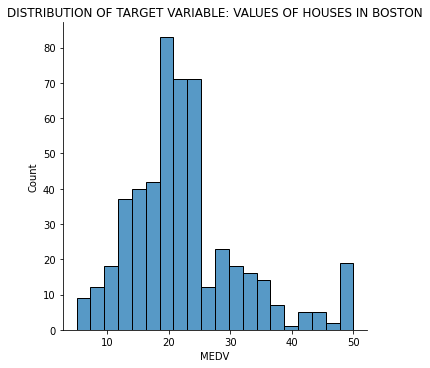

In [54]:
#Distribution of the target variable = MEDV
sns.displot(df['MEDV'], bins =20)
plt.title('DISTRIBUTION OF TARGET VARIABLE: VALUES OF HOUSES IN BOSTON')
plt.show()

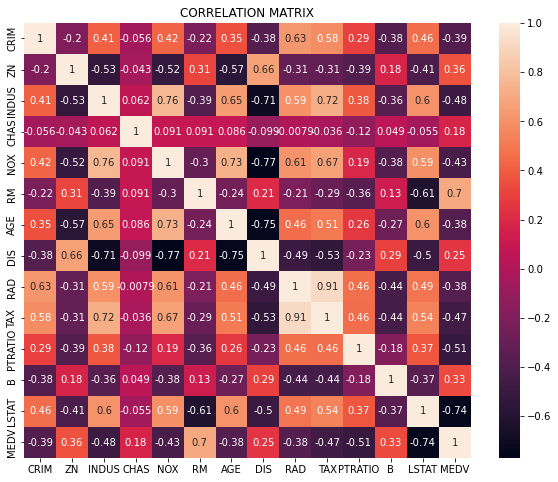

In [65]:
#Correlation matrix 
plt.figure(figsize=(10,8))
plt.title('CORRELATION MATRIX')
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Since the highest correlation with the target variable (MEDV) are RM(0.7) and LSTAT(-0.74) those two columns will be used as feature variables.

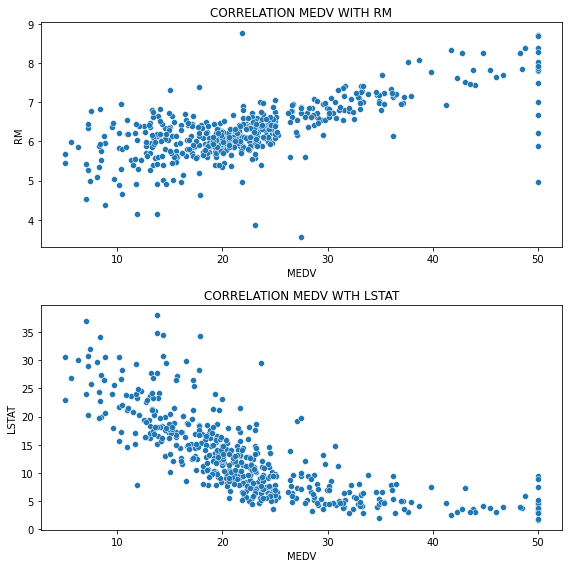

In [79]:
fig, axes = plt.subplots(nrows=2, ncols =1, figsize=(8,8))
axes[0].set_title('CORRELATION MEDV WITH RM')
sns.scatterplot(ax= axes[0],x= df['MEDV'], y= df['RM'], data= df)
axes[1].set_title('CORRELATION MEDV WTH LSTAT')
sns.scatterplot(ax=axes[1],x= df['MEDV'], y= df['LSTAT'], data= df)
plt.tight_layout()

In [83]:
#Divide the dataset in training(input) and testing(output)
#The expected output of the model is the median value of occupied homes by using [LSTAT] and [RM] columns as inputs
housing_input = pd.DataFrame(np.c_[df['LSTAT'], df['RM']],columns=['LSTAT','RM'])
housing_output = df['MEDV']


In [84]:
#Divide the dataset into training & testing sets with 33% of the datasets being allocated to testing set.
X_train, X_test, y_train, y_test = train_test_split(housing_input,housing_output,test_size=0.33)

In [85]:
#Assess the distribution of the data 
X_train.describe()

,LSTAT,RM
count,338.000000,338.000000
mean,12.887071,6.251231
std,6.998083,0.629086
min,1.920000,4.368000
25%,7.515000,5.876250
50%,11.645000,6.168000
75%,16.945000,6.600500
max,34.770000,8.375000


In [86]:
X_test.describe()

,LSTAT,RM
count,167.000000,167.000000
mean,12.225389,6.350503
std,7.420448,0.831424
min,1.730000,3.561000
25%,6.570000,5.935500
50%,10.580000,6.250000
75%,17.030000,6.722500
max,37.970000,8.780000


In [87]:
y_test.describe()

count    167.000000
mean      23.289222
std       10.201701
min        7.000000
25%       16.100000
50%       21.500000
75%       27.500000
max       50.000000
Name: MEDV, dtype: float64

In [88]:
y_train.describe()

count    338.000000
mean      22.154734
std        8.663488
min        5.000000
25%       17.200000
50%       21.000000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

In [94]:
#Verify shape of the training and test sets
print(f"y_test: {y_test.shape}, y_train: {y_train.shape},X_test: {X_test.shape},X_train: {X_train.shape}")

y_test: (167,), y_train: (338,),X_test: (167, 2),X_train: (338, 2)
